In [ ]:
# day32_Email SMTP and the datetime module_240808
# learn how to send a email using Python code
# determine when to send a email using the daytime module
# Automated Birthday Wisher
# Email SMTP: a module that comes pre-bundled with Python and it helps us send email using Python code
# daytime: a Python module that helps us figure out what today's date is or how to format a particular date and time
# SMTP(Simple Mail Transfer Protocol): all of the rules that determine how an email is received by mail servers passed onto the next mail server and how email can be sent around

In [ ]:
# SMTP practice
import smtplib

my_email = "#####@yahoo.com"
password = "#####"


with smtplib.SMTP("smtp.mail.yahoo.com") as connection: # SMTP information is different with each sites
    connection.starttls()  # TLS(Transport Layer Security): a way of securing our connection to all email server
    connection.login(user=my_email, password=password)
    connection.sendmail(
        from_addr=my_email,
        to_addrs="####@gmail.com",
        msg="Subject:Hello\n\nThis is the body of my email/"
        )

In [1]:
# datetime module
import datetime as dt
now = dt.datetime.now()
print(now)

2024-08-09 15:39:02.757821


In [2]:
year = now.year
print(year)

2024


In [3]:
print(type(year))

<class 'int'>


In [5]:
print(type(now))  # object

<class 'datetime.datetime'>


In [7]:
month = now.month
day_of_week = now.weekday()
print(day_of_week)  # start from 0, today is Friday

4


In [9]:
date_of_birth = dt.datetime(year=1998, month=10, day=16)
print(date_of_birth)

1998-10-16 00:00:00


In [ ]:
# Monday motivation quote e-mail application
import datetime as dt
import random

# STEP1. Save motivation quotes in a list
with open("quotes.txt", mode="r") as file:
    quotes = file.readlines()
    # print(quotes)
# print(quotes[10])  # "A ship is always safe at shore but that is not what it's built for." - Albert Einstein
# print(len(quotes))  # 102

# STEP2. Check today weekday
now = dt.datetime.now()
day_of_week = now.weekday()
# print(day_of_week)  # 4
# print(type(day_of_week))  # <class 'int'>

# STEP3. Send a quote to the email
if day_of_week == 4:
    quotes_num = random.randint(0, len(quotes)-1)
    send_mail('####@gmail.com', 'Monday motivation quotes',quotes[quotes_num])

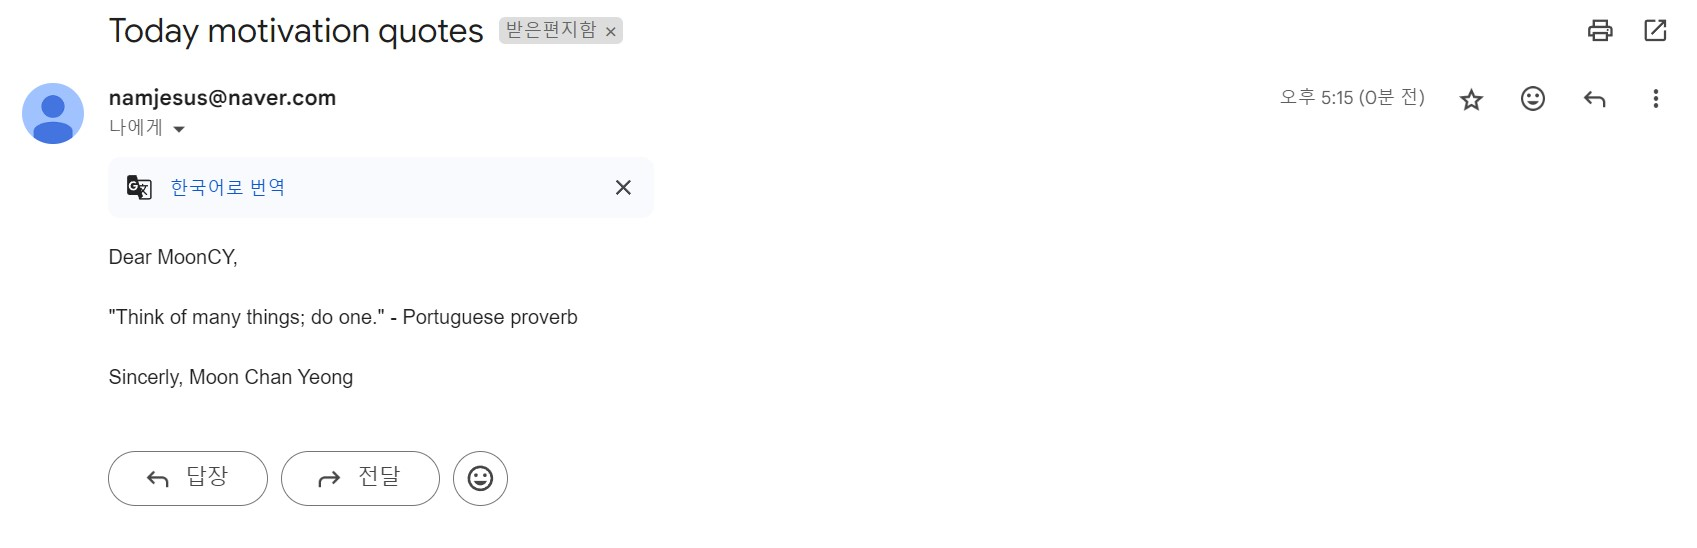

In [10]:
# playing screen
from PIL import Image
from IPython.display import display
img = Image.open('motivation_mail.jpg')
display(img)

In [ ]:
# final project _my solution
##################### Extra Hard Starting Project ######################
from mail_sending import send_mail
import datetime as dt
import random

# 1. Update the birthdays.csv > Make receiver_list.csv
# 1-1. make a new csv file
import pandas as pd
receiver_list = pd.DataFrame([{'name':"#####",
                               "email_address":"#####@gmail.com"}])
receiver_list.to_csv("receiver_list.csv")

# 1-2. add a person and save the file
receiver_list.loc[len(receiver_list)] = ['#####','#####@postech.ac.kr']
receiver_list.to_csv("receiver_list.csv")


# 2. Check if today matches a birthday in the birthdays.csv
#    > Save motivation quotes in a list and Check whether today is Monday.
with open("quotes.txt") as file:
    all_quotes = file.readlines()

now = dt.datetime.now()
day_of_week = now.weekday()
if day_of_week == 4:
    a_quote = random.choice(all_quotes)

    receiver_list_names = receiver_list.name.to_list()

    for receiver_name in receiver_list_names:
        # email format change
        letter_num = random.randint(1,3)  # 3. pick a random letter
        with open(f"./letter_templates/letter_{letter_num}.txt") as letter_form:
            letter = letter_form.readlines()

        letter[0] = f"Dear {receiver_name},\n"
        letter[2] = a_quote
        letter[4] = "Sincerly, #####"
        del letter[5]
        del letter[5]

        letter_line = ""
        for i in range(len(letter)):
            letter_line += letter[i]

        # print(letter_line)
        # print(receiver_list[receiver_list.name == receiver_name].email_address.to_list()[0])

        # 4. send the letter to the person's email address
        send_mail(receiver_list[receiver_list.name == receiver_name].email_address.to_list()[0],
                  'Today motivation quotes',
                  letter_line)

In [ ]:
# 네이버 이메일 보내기
# https://u-comensee.tistory.com/183
# https://wikidocs.net/35963
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from smtplib import SMTP_SSL
from email.mime.base import MIMEBase
from email import encoders

from os.path import basename

SMTP_SERVER = "smtp.naver.com"
SMTP_PORT = 465
SMTP_USER = "#####@naver.com"
SMTP_PASSWORD = "#####"  # naverpassword


def send_mail(recvs, mail_title, contents, attachment=False):
    msg = MIMEMultipart("alternative")

    msg['From'] = SMTP_USER
    msg['To'] = recvs
    msg['Subject'] = mail_title

    text = MIMEText(contents)
    msg.attach(text)

    smtp = SMTP_SSL(SMTP_SERVER, SMTP_PORT)
    smtp.login(SMTP_USER, SMTP_PASSWORD)
    smtp.sendmail(SMTP_USER, recvs.split(','), msg.as_string())
    smtp.close()